In [4]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load data from summary.jsonl
summary_file = "experiment_results/summary.jsonl"
data = []

with open(summary_file, "r") as file:
    for line in file:
        record = json.loads(line)
        # Only include relevant fields for plotting and calculations
        data.append({
            "method": record["method"],
            "model": record["model"],
            "average_time": record.get("average_time", 0),  # Default to 0 if missing
            "average_peak_memory": record.get("average_peak_memory", 0),  # Default to 0 if missing
            "average_net_memory_change": record.get("average_net_memory_change", 0),  # Default to 0 if missing
            "energy_consumed_kWh": record.get("energy_consumed_kWh", 0)  # Default to 0 if missing
        })

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data)

# Handle duplicates by aggregating (e.g., taking the mean for duplicates)
df = df.groupby(['method', 'model'], as_index=False).mean()

# Save df for plotting use
df_pivot_time = df.pivot(index='method', columns='model', values='average_time')
df_pivot_memory = df.pivot(index='method', columns='model', values='average_peak_memory')


In [5]:
# Summary by method
method_summary = df.groupby('method').agg({
    'average_time': ['mean', 'std'],
    'average_peak_memory': ['mean', 'std'],
    'average_net_memory_change': ['mean', 'std'],
    'energy_consumed_kWh': ['mean', 'std']
})
method_summary.columns = ['_'.join(col).strip() for col in method_summary.columns.values]

# Display the method summary
method_summary

,average_time_mean,average_time_std,average_peak_memory_mean,average_peak_memory_std,average_net_memory_change_mean,average_net_memory_change_std,energy_consumed_kWh_mean,energy_consumed_kWh_std
method,,,,,,,,
AblationStudies,4.131411,2.333932,37.497070,23.942847,0.191406,0.000000,0.311816,0.172480
CAM,0.029126,0.018891,133.428748,21.825436,103.143915,18.994710,0.002199,0.001417
DeepLiftShap,0.095074,0.079222,1129.835541,215.455620,12.239022,0.131676,0.007270,0.006095
Grad_CAM,0.021924,0.010281,133.499596,21.911508,104.221419,20.741970,0.001663,0.000774
Grad_CAM_plus_plus,0.068432,0.034790,141.034489,20.358827,105.300604,18.783608,0.005248,0.002707
GradientShap,0.079731,0.054168,576.009458,99.748595,0.574219,0.000000,0.006114,0.004193
GuidedBackprop,0.060278,0.029599,135.807541,21.096719,0.574219,0.000000,0.004654,0.002328
InputXGradient,0.058667,0.032701,135.547525,20.555129,1.148438,0.000000,0.004509,0.002544
IntegratedGradients,1.168398,1.129105,5311.183919,1104.867756,0.000000,0.000000,0.087307,0.082744


In [6]:
# Rename headers to normalized versions
method_summary.columns = [
    'Avg Time (s)',
    'Std Time (s)',
    'Avg Peak Memory (MB)',
    'Std Peak Memory (MB)',
    'Avg Net Mem Change (MB)',
    'Std Net Mem Change (MB)',
    'Avg Energy (kWh)',
    'Std Energy (kWh)'
]

# Styling the method summary table with larger size
styled_table = (
    method_summary.style
    .background_gradient(cmap="coolwarm", subset=['Avg Time (s)', 'Avg Peak Memory (MB)', 
                                                  'Avg Net Mem Change (MB)', 'Avg Energy (kWh)'])  # Highlight average values
    .format({
        'Avg Time (s)': '{:.4f}',
        'Std Time (s)': '{:.4f}',
        'Avg Peak Memory (MB)': '{:.2f}',
        'Std Peak Memory (MB)': '{:.2f}',
        'Avg Net Mem Change (MB)': '{:.2f}',
        'Std Net Mem Change (MB)': '{:.2f}',
        'Avg Energy (kWh)': '{:.4f}',
        'Std Energy (kWh)': '{:.4f}'
    })  # Format numbers with appropriate precision
    .set_caption("Summary of XAI Methods with Mean and Standard Deviation Metrics")
    .set_properties(**{
        'text-align': 'center',
        'font-size': '14px',  # Increase font size
        'padding': '10px'  # Increase padding
    })
    .set_table_styles([
        {'selector': 'caption', 'props': 'caption-side: top; font-size: 20px; font-weight: bold; text-align: center;'},  # Larger caption
        {'selector': 'th', 'props': 'text-align: center; font-size: 16px; font-weight: bold; padding: 10px;'},  # Larger headers
        {'selector': 'td', 'props': 'font-size: 14px; padding: 10px;'}  # Larger table cells
    ])
)

os.mkdir("results") if not os.path.exists("results") else None

# Save the styled table to HTML
styled_table.to_html("results/styled_method_summary.html")

# Display the styled table in the notebook
display(styled_table)


,Avg Time (s),Std Time (s),Avg Peak Memory (MB),Std Peak Memory (MB),Avg Net Mem Change (MB),Std Net Mem Change (MB),Avg Energy (kWh),Std Energy (kWh)
method,,,,,,,,
AblationStudies,4.1314,2.3339,37.50,23.94,0.19,0.00,0.3118,0.1725
CAM,0.0291,0.0189,133.43,21.83,103.14,18.99,0.0022,0.0014
DeepLiftShap,0.0951,0.0792,1129.84,215.46,12.24,0.13,0.0073,0.0061
Grad_CAM,0.0219,0.0103,133.50,21.91,104.22,20.74,0.0017,0.0008
Grad_CAM_plus_plus,0.0684,0.0348,141.03,20.36,105.30,18.78,0.0052,0.0027
GradientShap,0.0797,0.0542,576.01,99.75,0.57,0.00,0.0061,0.0042
GuidedBackprop,0.0603,0.0296,135.81,21.10,0.57,0.00,0.0047,0.0023
InputXGradient,0.0587,0.0327,135.55,20.56,1.15,0.00,0.0045,0.0025
IntegratedGradients,1.1684,1.1291,5311.18,1104.87,0.00,0.00,0.0873,0.0827


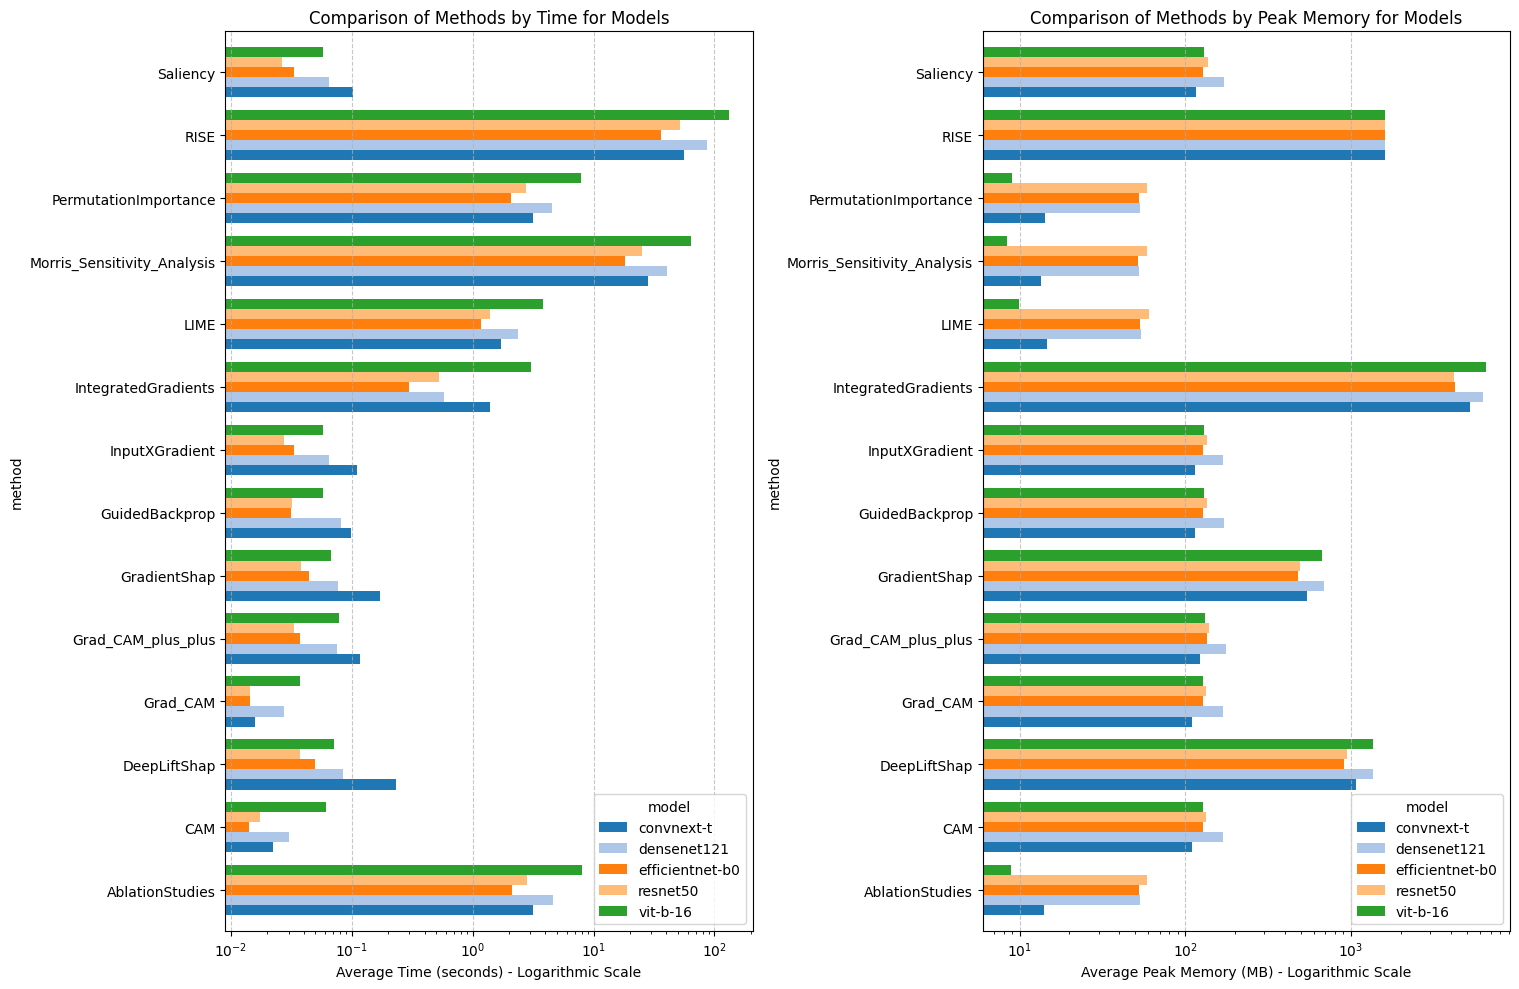

In [7]:
# Dynamically generate colors for distinguishable bars
num_models = len(df_pivot_time.columns)
colors = sns.color_palette("tab20", num_models)  # Tab20 offers a wide range of distinct colors

# Set up the plot
fig, ax = plt.subplots(1, 2, figsize=(18, 10))  # Larger figure size for clarity

# Plot the average time for each method (side by side for models)
df_pivot_time.plot(
    kind='barh',
    ax=ax[0],
    logx=True,
    color=colors,
    width=0.8  # Increase bar width
)
ax[0].set_xlabel('Average Time (seconds) - Logarithmic Scale')
ax[0].set_title('Comparison of Methods by Time for Models')
ax[0].grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines for better readability

# Plot the average peak memory for each method (side by side for models)
df_pivot_memory.plot(
    kind='barh',
    ax=ax[1],
    logx=True,
    color=colors,
    width=0.8  # Increase bar width
)
ax[1].set_xlabel('Average Peak Memory (MB) - Logarithmic Scale')
ax[1].set_title('Comparison of Methods by Peak Memory for Models')
ax[1].grid(axis='x', linestyle='--', alpha=0.7)

# Add legends for clarity and place them outside the plots
#ax[0].legend(title='Models', loc='center left', bbox_to_anchor=(1.0, 0.5))
#ax[1].legend(title='Models', loc='center left', bbox_to_anchor=(1.0, 0.5))

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Add space for legends

# Save the plot to a file
#plt.savefig("results/comparison_plot.png", bbox_inches="tight")

# Show the plot
plt.show()


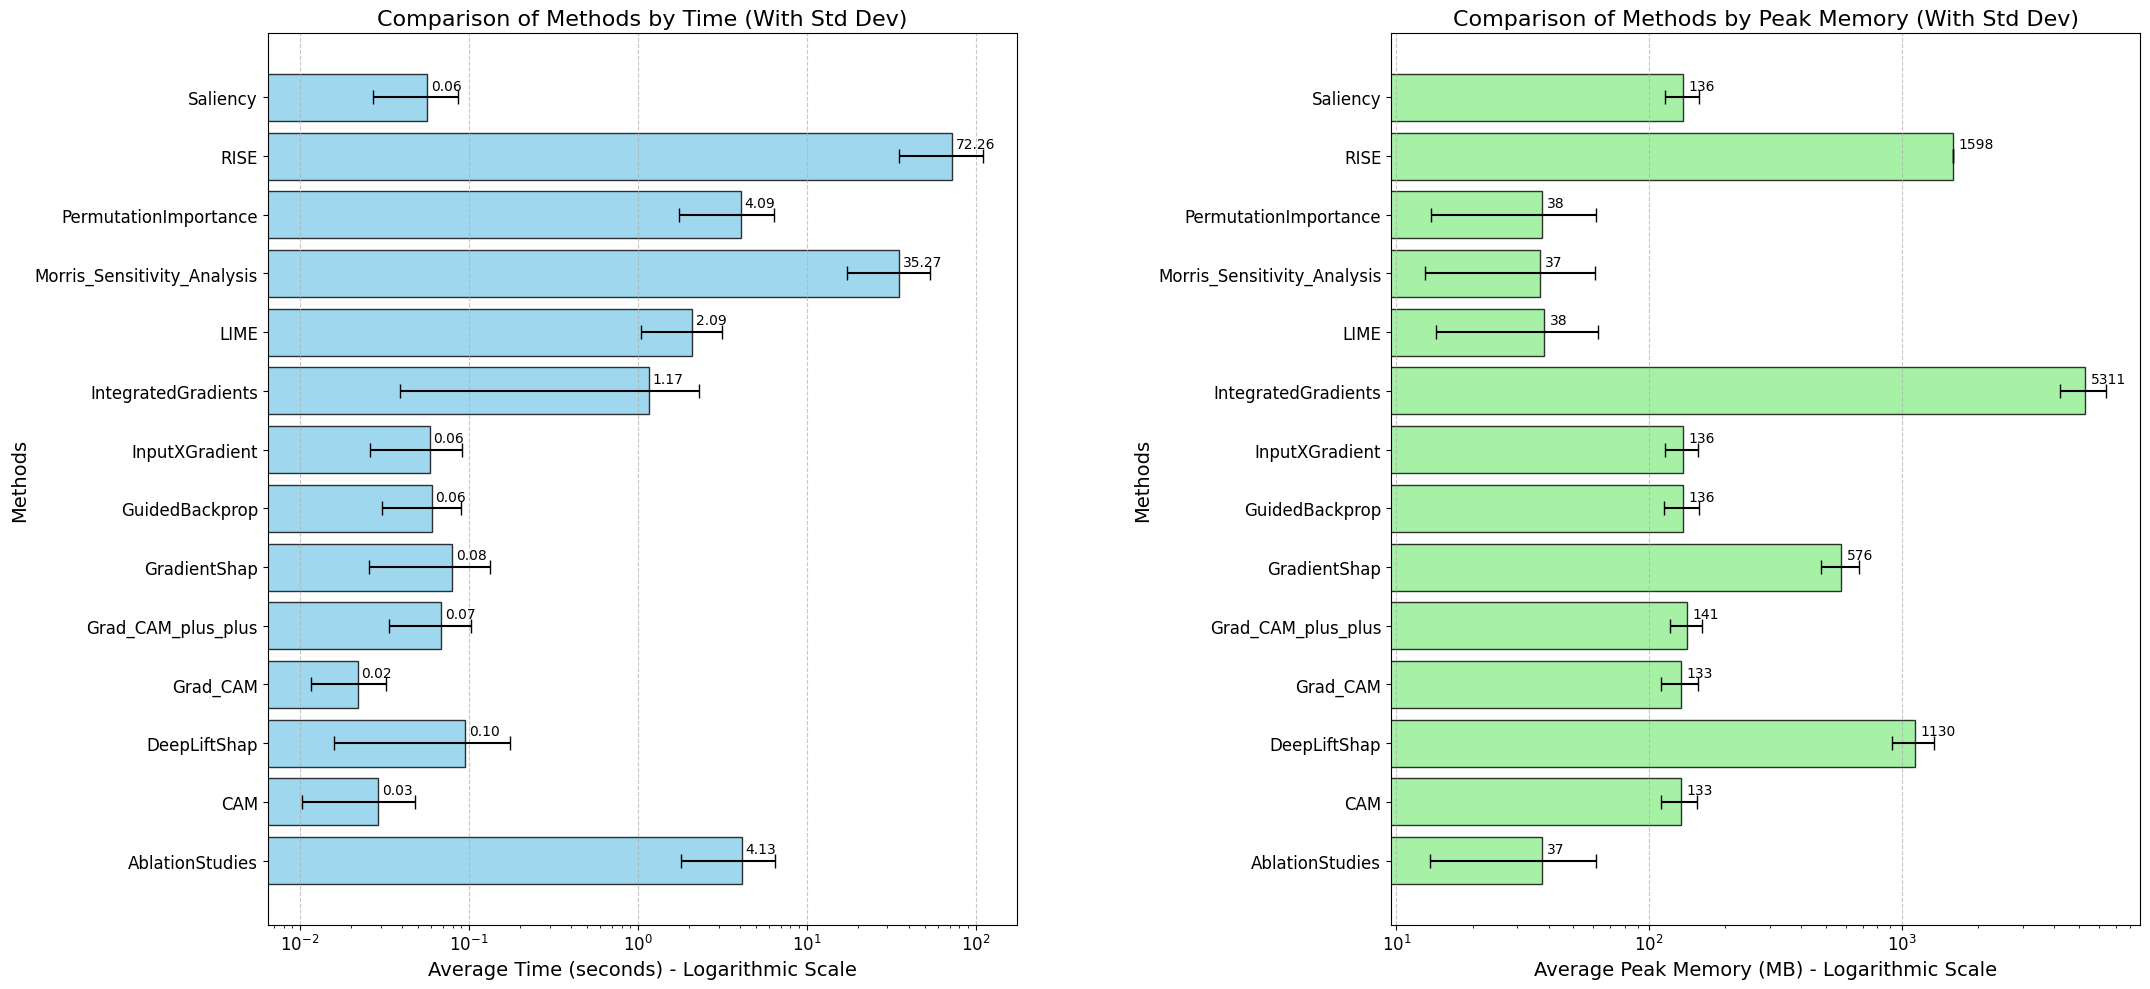

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Extract mean and standard deviation based on renamed columns
avg_time = method_summary['Avg Time (s)']
std_time = method_summary['Std Time (s)']
avg_memory = method_summary['Avg Peak Memory (MB)']
std_memory = method_summary['Std Peak Memory (MB)']

# Generate the plot
fig, ax = plt.subplots(1, 2, figsize=(24, 10))  # Increased figure width

# Function to add values with x and y offsets
def add_values_to_bars(ax, bars, fmt=".4f", x_offset_factor=0.05, y_offset=0.2):
    for bar in bars:
        try:
            width = float(bar.get_width())
            if not pd.isna(width):  # Check if the value is valid
                ax.text(
                    width + (x_offset_factor * abs(width)),  # Add x-offset
                    bar.get_y() + bar.get_height() / 2 + y_offset,  # Add y-offset
                    f"{width:{fmt}}",
                    va="center",
                    ha="left",  # Align horizontally to the left of the text
                    fontsize=10  # Slightly larger text for bar values
                )
        except (ValueError, TypeError):
            continue  # Skip invalid values



# Plot the average time for each method with standard deviation
bars_time = ax[0].barh(
    method_summary.index, avg_time, xerr=std_time, log=True, color="skyblue", edgecolor="black", capsize=5, alpha=0.8
)
ax[0].set_xlabel('Average Time (seconds) - Logarithmic Scale', fontsize=14)
ax[0].set_title('Comparison of Methods by Time (With Std Dev)', fontsize=16)
ax[0].grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines for better readability
ax[0].set_ylabel('Methods', fontsize=14)
ax[0].tick_params(axis='both', labelsize=12)

# Add values to bars (time) with 2 decimal places
add_values_to_bars(ax[0], bars_time.patches, fmt=".2f")

# Plot the average peak memory for each method with standard deviation
bars_memory = ax[1].barh(
    method_summary.index, avg_memory, xerr=std_memory, log=True, color="lightgreen", edgecolor="black", capsize=5, alpha=0.8
)
ax[1].set_xlabel('Average Peak Memory (MB) - Logarithmic Scale', fontsize=14)
ax[1].set_title('Comparison of Methods by Peak Memory (With Std Dev)', fontsize=16)
ax[1].grid(axis='x', linestyle='--', alpha=0.7)
ax[1].set_ylabel('Methods', fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)

# Add values to bars (memory) with 0 decimal places
add_values_to_bars(ax[1], bars_memory.patches, fmt=".0f")

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 0.9, 1])
fig.subplots_adjust(wspace=0.5)  # Increase the horizontal space between subplots

# Save the plot to a file
plt.savefig("results/comparison_plot_with_stddev.png", bbox_inches="tight")

# Display the plot
plt.show()


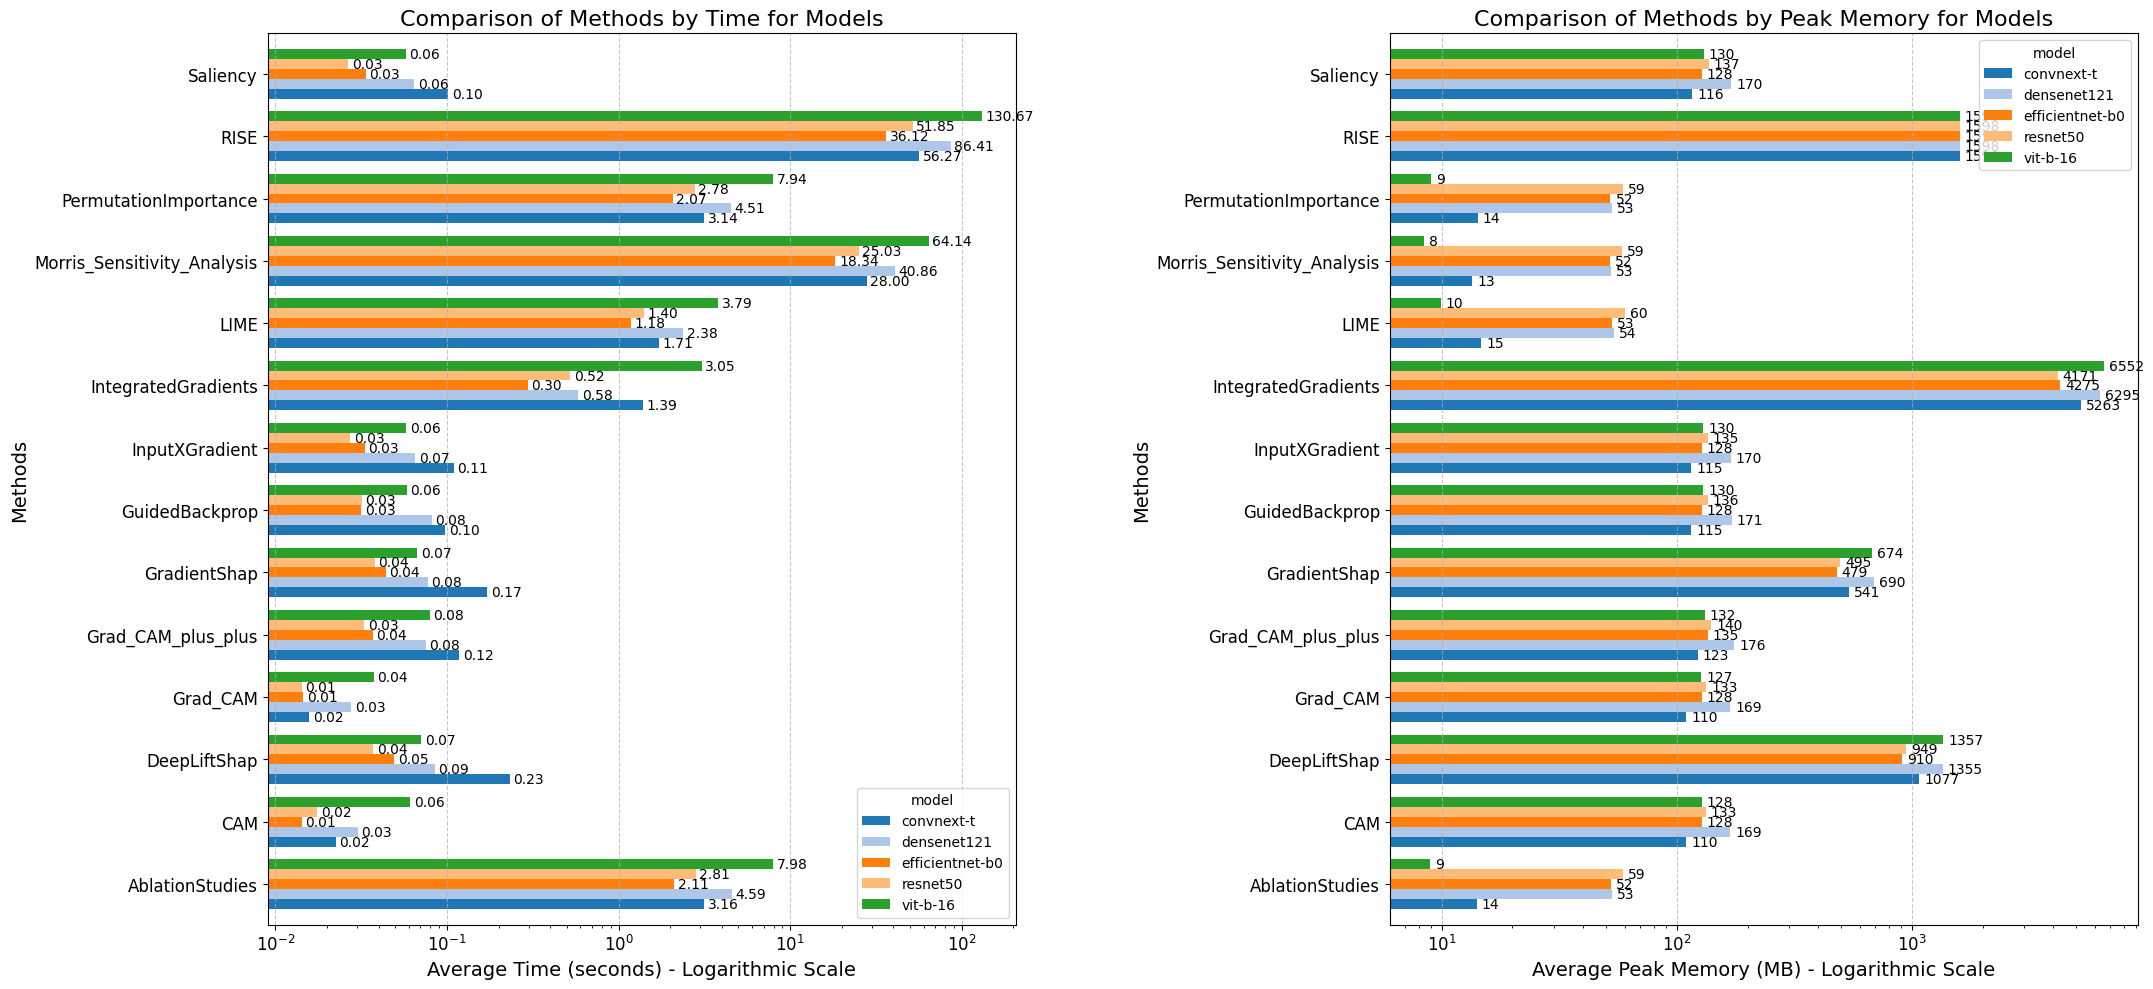

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display, FileLink

# Generate the plot
fig, ax = plt.subplots(1, 2, figsize=(24, 10))  # Increased figure width

# Function to add values at the end of bars
def add_values_to_bars(ax, bars, fmt=".4f", offset_factor=0.05):
    for bar in bars:
        try:
            width = float(bar.get_width())
            if not pd.isna(width):  # Check if the value is valid
                ax.text(
                    width + (offset_factor * width),  # Adjusted offset factor for better alignment
                    bar.get_y() + bar.get_height() / 2,
                    f"{width:{fmt}}",
                    va="center",
                    ha="left",
                    fontsize=10  # Slightly larger text for bar values
                )
        except (ValueError, TypeError):
            continue  # Skip invalid values

# Plot the average time for each method (side by side for models)
bars_time = df_pivot_time.plot(
    kind='barh',
    ax=ax[0],
    logx=True,
    color=colors,
    width=0.8  # Increase bar width
)
ax[0].set_xlabel('Average Time (seconds) - Logarithmic Scale', fontsize=14)
ax[0].set_title('Comparison of Methods by Time for Models', fontsize=16)
ax[0].grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines for better readability

# Set y-axis label (methods)
ax[0].set_ylabel('Methods', fontsize=14)

# Increase tick label size (both x and y)
ax[0].tick_params(axis='both', labelsize=12)

# Add values to bars (time) with 2 decimal places
for container in bars_time.containers:
    add_values_to_bars(ax[0], container, fmt=".2f")

# ax[0].legend().remove() # Remove the legend from the first plot

# Plot the average peak memory for each method (side by side for models)
bars_memory = df_pivot_memory.plot(
    kind='barh',
    ax=ax[1],
    logx=True,
    color=colors,
    width=0.8  # Increase bar width
)
ax[1].set_xlabel('Average Peak Memory (MB) - Logarithmic Scale', fontsize=14)
ax[1].set_title('Comparison of Methods by Peak Memory for Models', fontsize=16)
ax[1].grid(axis='x', linestyle='--', alpha=0.7)

# Set y-axis label (methods) on the second subplot
ax[1].set_ylabel('Methods', fontsize=14)

# Increase tick label size (both x and y)
ax[1].tick_params(axis='both', labelsize=12)

# Add values to bars (memory) with 0 decimal places
for container in bars_memory.containers:
    add_values_to_bars(ax[1], container, fmt=".0f")

# Keep legend on the second plot
#ax[1].legend(title='Models', loc='center left', bbox_to_anchor=(1.0, 0.5), 
  #           fontsize=12, title_fontsize=14)

# First plot's legend is removed (if needed uncomment below)
# ax[0].legend().remove()

# Adjust layout for better spacing: 
#  - tight_layout() for nice overall spacing
#  - subplots_adjust(wspace=...) to increase distance between the two subplots
plt.tight_layout(rect=[0, 0, 0.9, 1])  
fig.subplots_adjust(wspace=0.5)  # Increase the horizontal space between subplots

# Save the plot to a file
plt.savefig("results/comparison_plot_adjusted.png", bbox_inches="tight")

# Display the plot
plt.show()

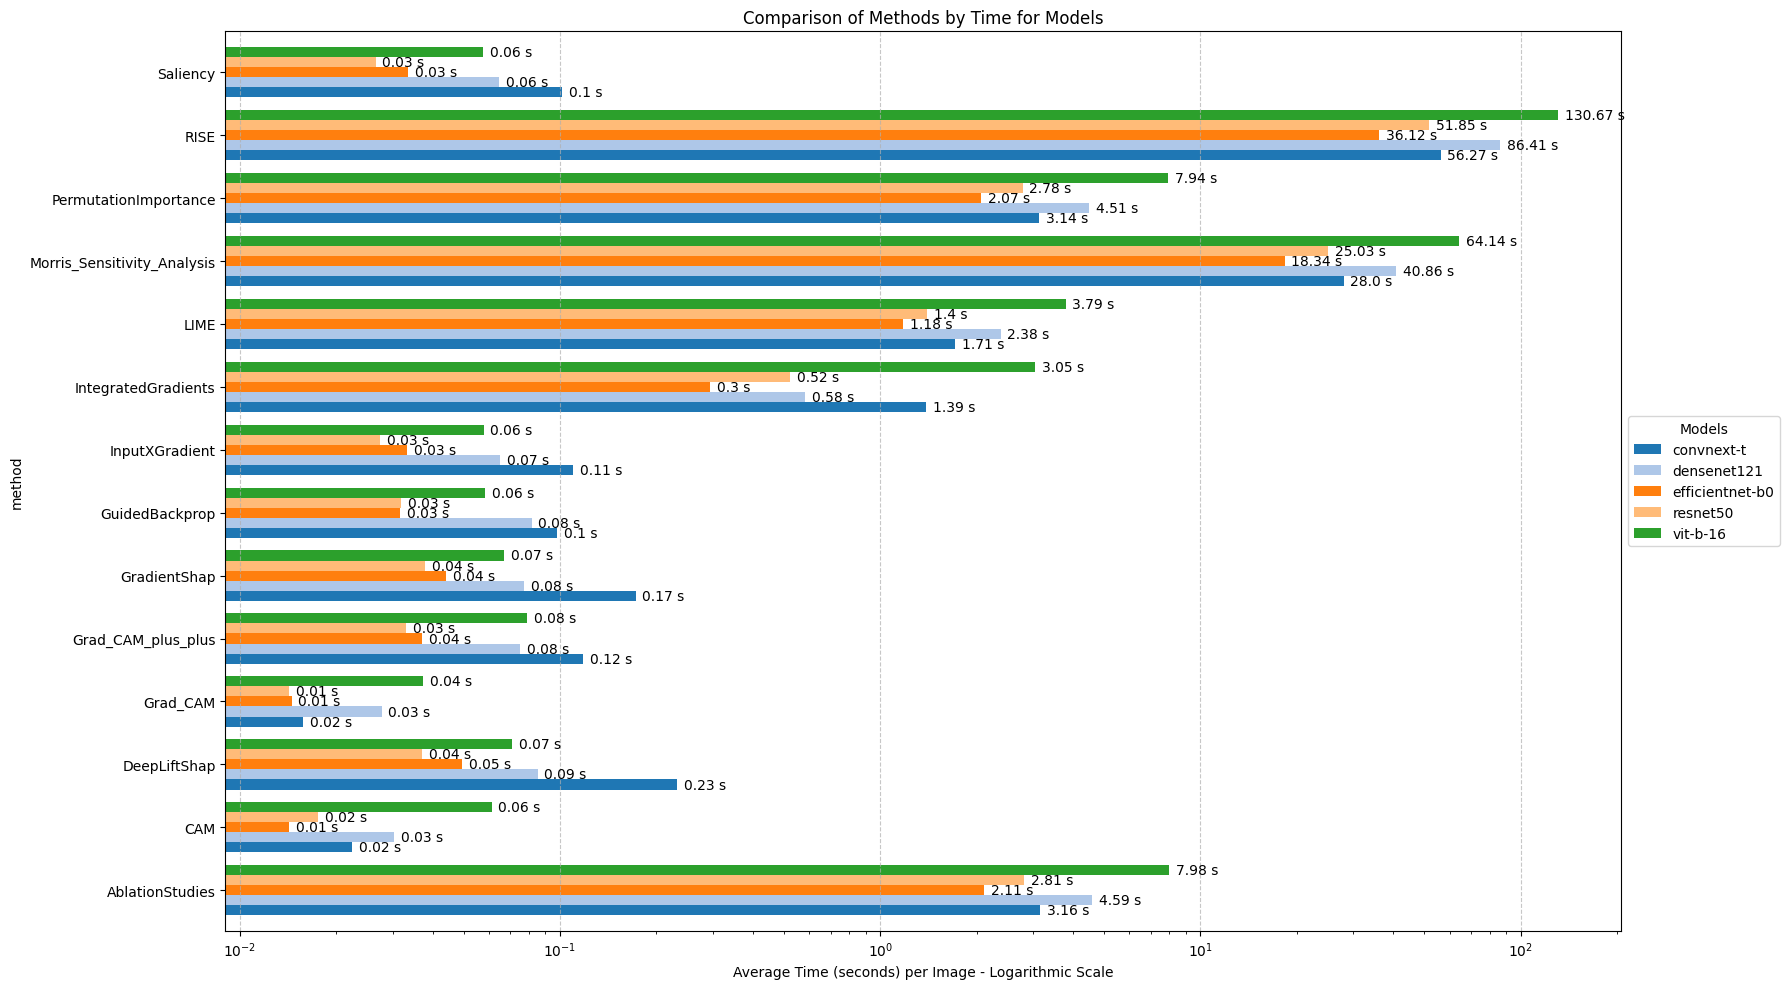

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Assuming `df` is already created from your summary file
# Pivot the DataFrame to prepare data for the average time
df_pivot_time = df.pivot(index='method', columns='model', values='average_time')

# Define colors for the models
num_models = len(df_pivot_time.columns)
colors = sns.color_palette("tab20", num_models)  # Tab20 offers a wide range of distinct colors

# Adjust layout for more space
fig, ax = plt.subplots(figsize=(18, 10))  # Single plot, increased figure size

# Plot the average time for each method (side by side for models)
bars_time = df_pivot_time.plot(
    kind='barh',
    ax=ax,
    logx=True,
    color=colors,
    width=0.8  # Increase bar width
)
ax.set_xlabel('Average Time (seconds) per Image - Logarithmic Scale')
ax.set_title('Comparison of Methods by Time for Models')
ax.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines for better readability

# Function to add rounded values to bars
def add_rounded_values_to_bars(ax, bars, offset_factor=0.05):
    for bar in bars:
        try:
            width = float(bar.get_width())
            if not pd.isna(width):  # Check if the value is valid
                ax.text(
                    width + (offset_factor * width),  # Adjusted offset factor for better alignment
                    bar.get_y() + bar.get_height() / 2,
                    f"{round(width, 2)} s",  # Rounded to 2 decimal places with "s"
                    va="center",
                    ha="left",
                    fontsize=10
                )
        except (ValueError, TypeError):
            continue  # Skip invalid values

# Add rounded values to bars
for container in bars_time.containers:
    add_rounded_values_to_bars(ax, container)

# Add legend for clarity and place it outside the plot
ax.legend(title='Models', loc='center left', bbox_to_anchor=(1.0, 0.5))

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 1])  # Adjusted for larger spacing

# Save the plot to a file
#plt.savefig("results/average_time_comparison_plot.png", bbox_inches="tight")

# Show the plot
plt.show()


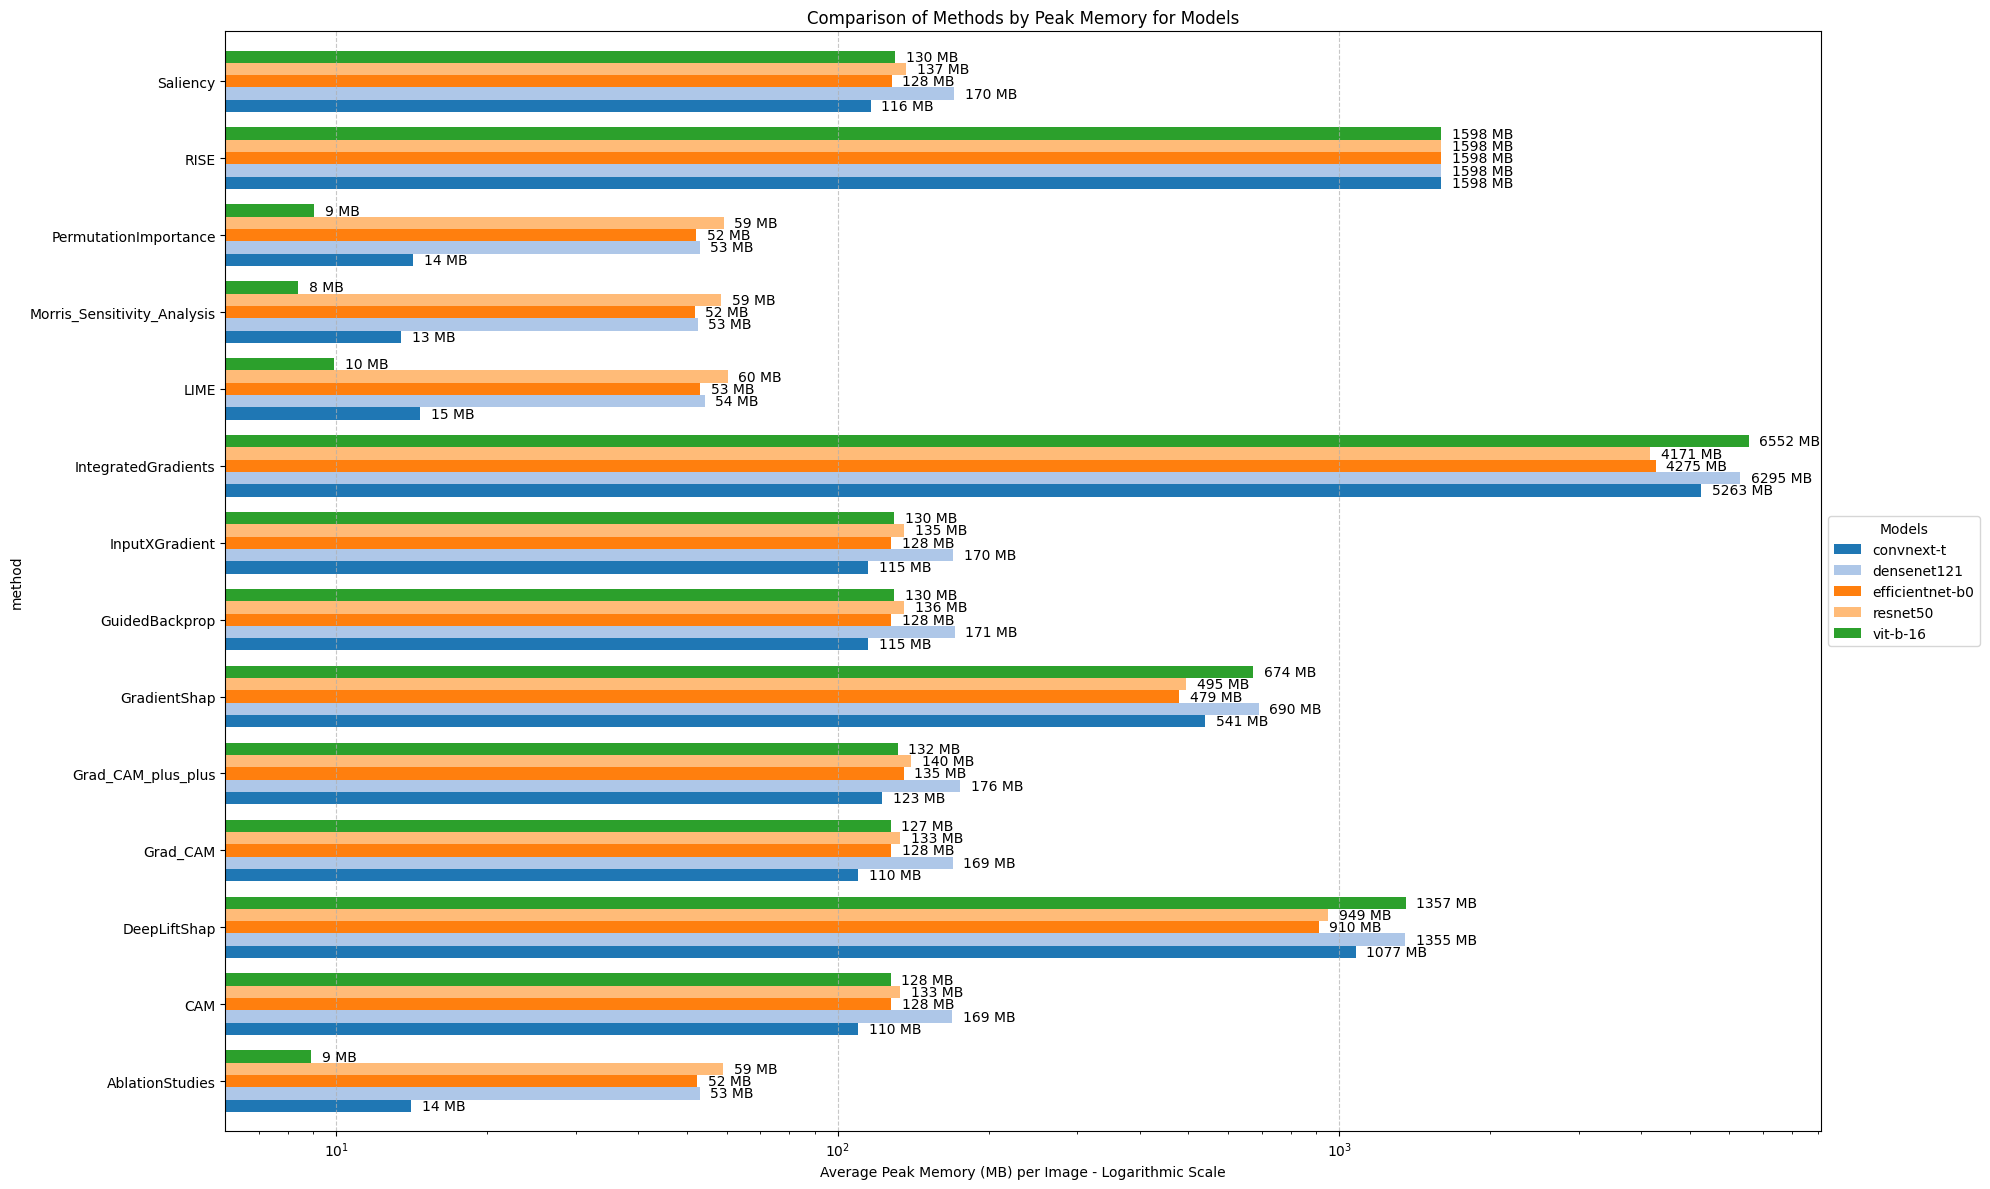

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Assuming `df` is already created from your summary file
# Pivot the DataFrame to prepare data for the average peak memory
df_pivot_memory = df.pivot(index='method', columns='model', values='average_peak_memory')

# Define colors for the models
num_models = len(df_pivot_memory.columns)
colors = sns.color_palette("tab20", num_models)  # Tab20 offers a wide range of distinct colors

# Adjust layout for more space
fig, ax = plt.subplots(figsize=(20, 12))  # Single plot, increased figure size

# Plot the average peak memory for each method (side by side for models)
bars_memory = df_pivot_memory.plot(
    kind='barh',
    ax=ax,
    logx=True,
    color=colors,
    width=0.8  # Increase bar width
)
ax.set_xlabel('Average Peak Memory (MB) per Image - Logarithmic Scale')
ax.set_title('Comparison of Methods by Peak Memory for Models')
ax.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines for better readability

# Function to add rounded values to bars
def add_rounded_values_to_bars(ax, bars, offset_factor=0.05):
    for bar in bars:
        try:
            width = float(bar.get_width())
            if not pd.isna(width):  # Check if the value is valid
                ax.text(
                    width + (offset_factor * width),  # Adjusted offset factor for better alignment
                    bar.get_y() + bar.get_height() / 2,
                    f"{round(width)} MB",  # Rounded values with "MB"
                    va="center",
                    ha="left",
                    fontsize=10
                )
        except (ValueError, TypeError):
            continue  # Skip invalid values

# Add rounded values to bars
for container in bars_memory.containers:
    add_rounded_values_to_bars(ax, container)

# Add legend for clarity and place it outside the plot
ax.legend(title='Models', loc='center left', bbox_to_anchor=(1.0, 0.5))

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 1])  # Adjusted for larger spacing

# Save the plot to a file
#plt.savefig("results/average_peak_memory_comparison_plot.png", bbox_inches="tight")

# Show the plot
plt.show()

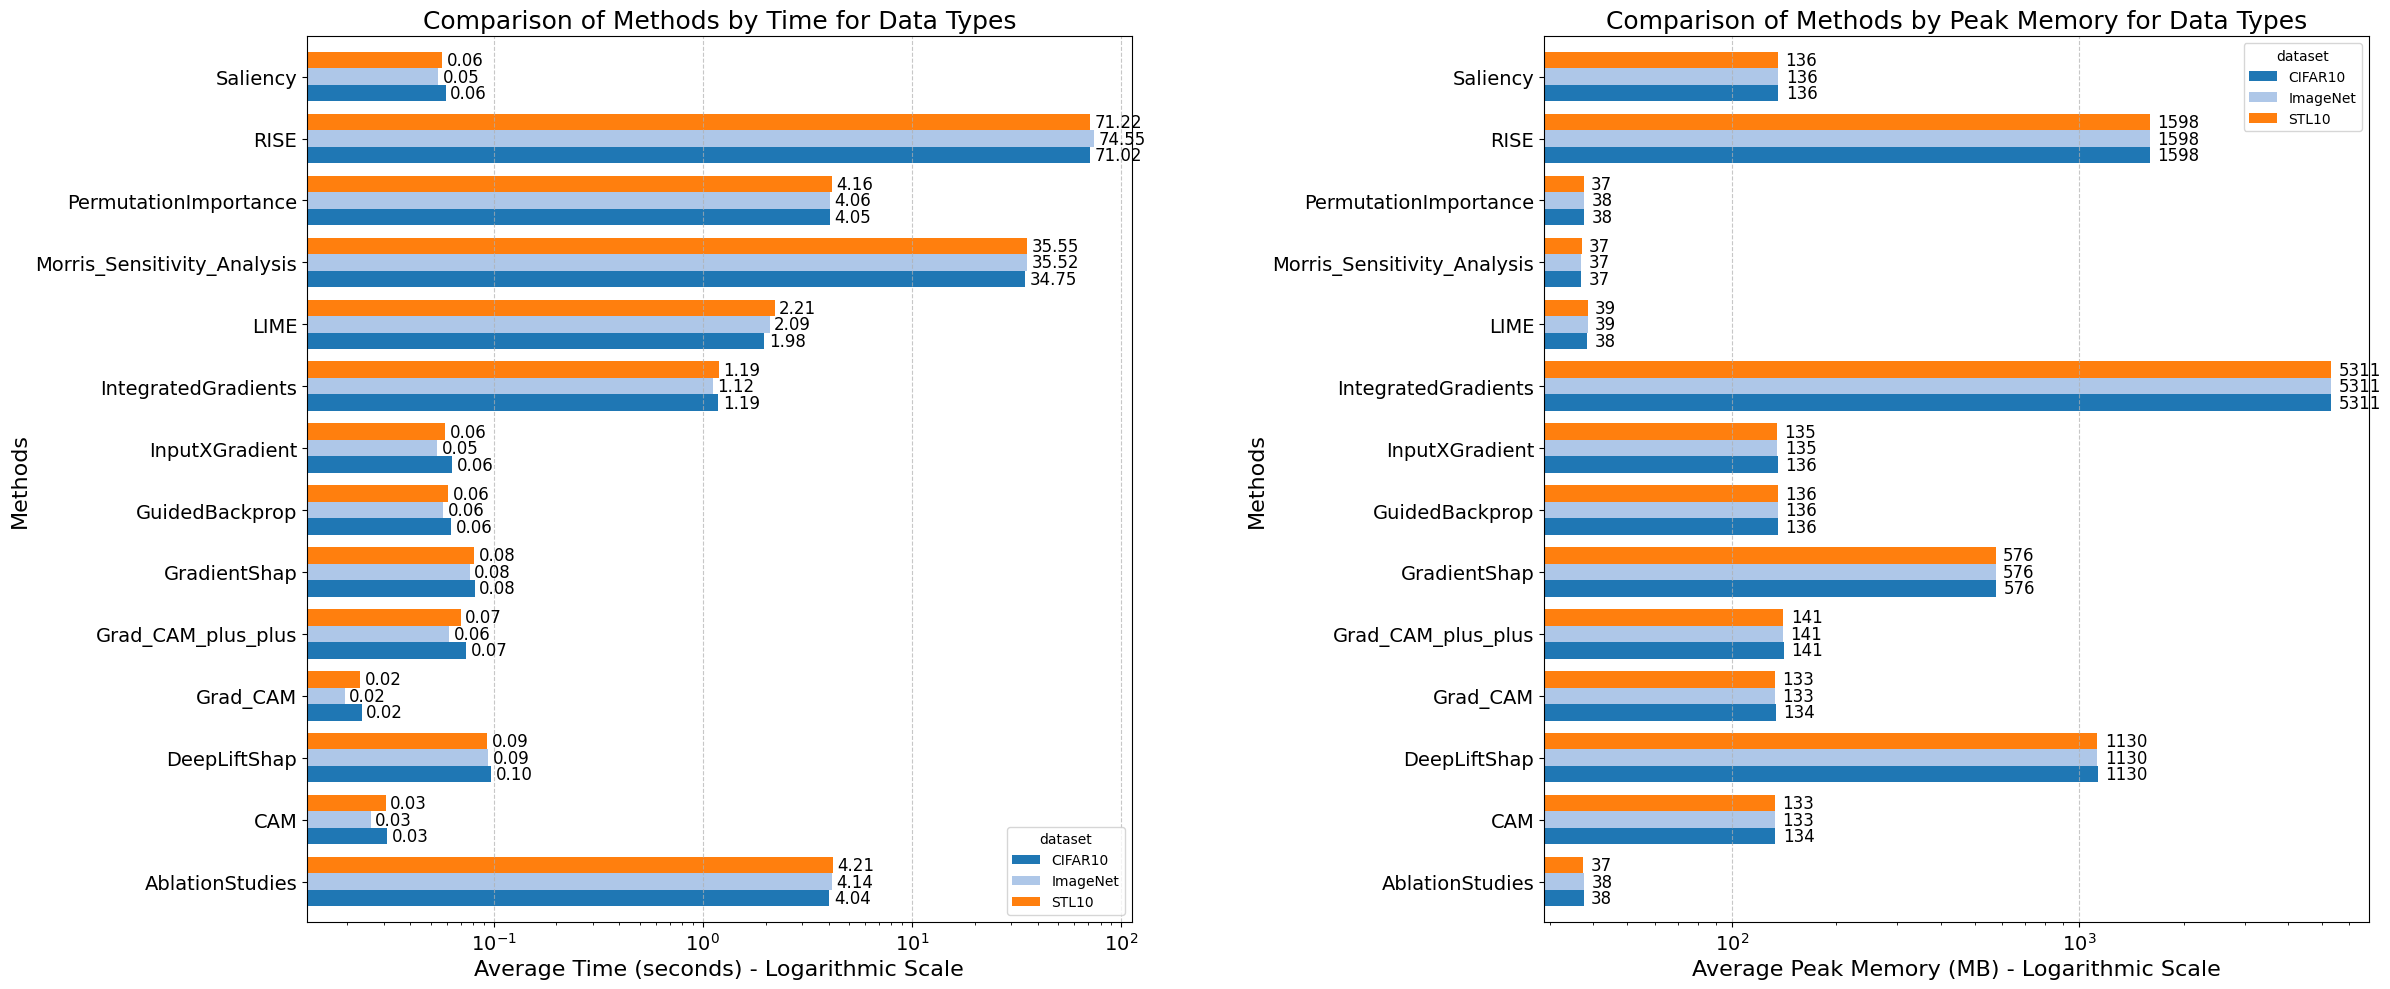

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display, FileLink

# Load and preprocess data
summary_file = "experiment_results/summary.jsonl"
data = pd.read_json(summary_file, lines=True)

# Group by method and data type, then calculate means
df = data.groupby(['method', 'dataset'], as_index=False).agg({
    'average_time': 'mean',
    'average_peak_memory': 'mean'
})

# Pivot data for plotting
df_pivot_time = df.pivot(index='method', columns='dataset', values='average_time')
df_pivot_memory = df.pivot(index='method', columns='dataset', values='average_peak_memory')

# Set up the plot - wider figure size for easier viewing
fig, ax = plt.subplots(1, 2, figsize=(24, 10))

# Generate distinguishable colors for bars
num_datasets = len(df_pivot_time.columns)
colors = sns.color_palette("tab20", num_datasets)

# Function to add values to bars
def add_values_to_bars(ax, bars, fmt=".2f", offset_factor=0.05, fontsize=12):
    for bar in bars:
        try:
            width = float(bar.get_width())
            if not pd.isna(width):
                ax.text(
                    width + (offset_factor * width),  # Offset for alignment
                    bar.get_y() + bar.get_height() / 2,
                    f"{width:{fmt}}",
                    va="center",
                    ha="left",
                    fontsize=fontsize  # Larger font size for bar labels
                )
        except (ValueError, TypeError):
            continue

# --- Plot average time for each method ---
bars_time = df_pivot_time.plot(
    kind='barh',
    ax=ax[0],
    logx=True,
    color=colors,
    width=0.8
)
ax[0].set_xlabel('Average Time (seconds) - Logarithmic Scale', fontsize=16)
ax[0].set_ylabel('Methods', fontsize=16)  # Add a y-axis label if desired
ax[0].set_title('Comparison of Methods by Time for Data Types', fontsize=18)
ax[0].tick_params(axis='both', labelsize=14)
ax[0].grid(axis='x', linestyle='--', alpha=0.7)

# Add values to bars (time) with 2 decimal places
for container in bars_time.containers:
    add_values_to_bars(ax[0], container, fmt=".2f", fontsize=12)

# --- Plot average peak memory for each method ---
bars_memory = df_pivot_memory.plot(
    kind='barh',
    ax=ax[1],
    logx=True,
    color=colors,
    width=0.8
)
ax[1].set_xlabel('Average Peak Memory (MB) - Logarithmic Scale', fontsize=16)
ax[1].set_ylabel('Methods', fontsize=16)  # Add a y-axis label if desired
ax[1].set_title('Comparison of Methods by Peak Memory for Data Types', fontsize=18)
ax[1].tick_params(axis='both', labelsize=14)
ax[1].grid(axis='x', linestyle='--', alpha=0.7)

# Add values to bars (memory) with no decimals
for container in bars_memory.containers:
    add_values_to_bars(ax[1], container, fmt=".0f", fontsize=12)

# (Optional) If you need legends, you can un-comment or adjust them:
# ax[0].legend(title='Data Types', loc='center left', bbox_to_anchor=(1.0, 0.5), 
#              fontsize=12, title_fontsize=14)
# ax[1].legend(title='Data Types', loc='center left', bbox_to_anchor=(1.0, 0.5), 
#              fontsize=12, title_fontsize=14)

# Use tight_layout for overall spacing
plt.tight_layout()

# Increase spacing between subplots
fig.subplots_adjust(wspace=0.5)

# Save the plot
plot_file_path = "results/comparison_plot_data_types.png"
plt.savefig(plot_file_path, bbox_inches="tight")

# Show the plot
plt.show()

1. `Feature Complexity:` ImageNet images typically contain more intricate and diverse features compared to simpler datasets like CIFAR10 or STL10. Attribution methods analyze these rich feature sets, requiring more computational effort.

2. `Model Adaptation:` Models pretrained on ImageNet are optimized for large, detailed datasets. Explaining predictions for such models involves processing more complex internal representations, increasing the computational load.